This dataset is from R package "lefser":The ZellerG_2014 dataset contains microbiome count data for CRC patients and controls. It was for curatedMetagenomicData using the script in the package directory "data-raw". source "Potential of fecal microbiota for early-stage detection of colorectal cancer" https://pubmed.ncbi.nlm.nih.gov/25432777/

The result is from sbatch script: there are also ROC curve and SHAP plot (show the largest 20 features)

|          | number      | Random Forest   | Accuracy       | F1             | MCC            | AUC            |
|----------------|----------------------|--------|----------------|----------------|----------------|----------------|
|AllFeatures    | 1585  | |0.487 (0.109) |0.472 (0.095)| 0.165 (0.173) |0.643 (0.064) |
| SelectMicro| 34  | |0.567 (0.093) |0.569 (0.093) | 0.320 (0.148) |0.682 (0.094)|
| Lasso_finetune    |19 | | 0.568 (0.080)|0.560 (0.081) |0.300 (0.127) |0.670 (0.060) |
| FS_Lasso_finetune |   20 |  | 0.512 (0.099)|0.509 (0.096)|0.218 (0.157)|0.664 (0.085) |
| SelectMicro| 34  | |0.567 (0.093) |0.569 (0.093) | 0.320 (0.148) |0.682 (0.094)|
| SelectMicro_subset| 16  | |0.532 (0.103) | 0.533 (0.100) | 0.263 (0.159) | 0.660 (0.075)|
| SelectMicro&env    |37 | | 0.563 (0.089) | 0.565 (0.085) |0.316 (0.128) | 0.743 (0.064)|
| SelectMicro_subset&env  |   19 |  |0.618 (0.079) | 0.616 (0.079) | 0.391 (0.121) | 0.746 (0.058) |


|          | number      | XGBoost   | Accuracy       | F1             | MCC            | AUC            |
|----------------|----------------------|--------|----------------|----------------|----------------|----------------|
|AllFeatures    | 1585  | |0.482 (0.075) |0.475 (0.068)| 0.160 (0.103)|0.623 (0.041)|
| SelectMicro| 34  | |0.492 (0.121)| 0.491 (0.117)| 0.195 (0.178)| 0.634 (0.077)|
| Lasso_finetune    |19 | | 0.543 (0.091)|0.529 (0.090)| 0.250 (0.136)| 0.669 (0.081)|
| FS_Lasso_finetune |   20 |  | 0.477 (0.056)| 0.474 (0.051)|0.165 (0.081)|0.629 (0.048) |
 SelectMicro_subset| 16  | |0.522 (0.073)| 0.514 (0.071)| 0.228 (0.107)|  0.654 (0.073)|
| SelectMicro&env    |37 | |0.618 (0.043)|  0.619 (0.038)|  0.394 (0.061)| 0.744 (0.029)|
| SelectMicro_subset&env  |   19 |  |0.608 (0.061)| 0.609 (0.056)|  0.376 (0.090)| 0.739 (0.033)|





|          | number      | SVM   | Accuracy       | F1             | MCC            | AUC            |
|----------------|----------------------|--------|----------------|----------------|----------------|----------------|
|AllFeatures    | 1585  | |0.492 (0.082)| 0.497 (0.075)| 0.220 (0.115)| 0.654 (0.069)|
| SelectMicro| 34  | |0.497 (0.079)| 0.501 (0.064)| 0.242 (0.111)|0.665 (0.098)|
| Lasso_finetune    |19 | | 0.492 (0.076)|0.498 (0.078)|0.217 (0.132)| 0.665 (0.109)|
| FS_Lasso_finetune |   20 |  |0.492 (0.091)| 0.499 (0.087)| 0.216 (0.143)| 0.657 (0.093) |



|          | number      | NB   | Accuracy       | F1             | MCC            | AUC            |
|----------------|----------------------|--------|----------------|----------------|----------------|----------------|
|AllFeatures    | 1585  | |0.336 (0.063)|0.315 (0.082)|0.099 (0.077)| 0.567 (0.039)|
| SelectMicro| 34  | |0.342 (0.085)|0.286 (0.116)|nan (nan)|0.679 (0.076)|
| Lasso_finetune    |19 | | 0.518 (0.029)| 0.456 (0.050)| 0.230 (0.080)| 0.686 (0.046)|
| FS_Lasso_finetune |   20 |  |0.352 (0.051)| 0.320 (0.071)| 0.182 (0.061)| 0.668 (0.080)|

In [1]:
import sys
sys.path.append('../../../Code')
import RunML
import FS
import metric

import pandas as pd
import numpy as np
import random

2025-04-10 12:21:46.225712: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 12:21:46.228154: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 12:21:46.231796: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 12:21:46.241573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744302106.258429 1664897 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744302106.26

In [2]:
data0 = pd.read_csv('../data/features_table_update.csv',index_col=0)

In [3]:
print(data0.index)
print(data0.shape)

Index(['CCIS00146684ST-4-0', 'CCIS00281083ST-3-0', 'CCIS02124300ST-4-0',
       'CCIS02379307ST-4-0', 'CCIS02856720ST-4-0', 'CCIS03473770ST-4-0',
       'CCIS03857607ST-4-0', 'CCIS05314658ST-4-0', 'CCIS06260551ST-3-0',
       'CCIS07277498ST-4-0',
       ...
       'CCMD88272491ST-21-0', 'CCMD90311071ST-21-0', 'CCMD93344354ST-21-0',
       'CCMD95433940ST-21-0', 'CCMD96553385ST-21-0', 'MMPU29365221ST',
       'MMPU68403337ST', 'MMPU72854103ST', 'MMPU84450604ST', 'MMPU99077057ST'],
      dtype='object', length=199)
(199, 1585)


In [4]:
cols_name = data0.columns

In [5]:
print(cols_name)

Index(['k__Bacteria', 'k__Viruses', 'k__Bacteria|p__Firmicutes',
       'k__Bacteria|p__Bacteroidetes', 'k__Bacteria|p__Actinobacteria',
       'k__Bacteria|p__Verrucomicrobia', 'k__Bacteria|p__Proteobacteria',
       'k__Viruses|p__Viruses_noname',
       'k__Bacteria|p__Candidatus_Saccharibacteria',
       'k__Bacteria|p__Firmicutes|c__Clostridia',
       ...
       'k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Moraxellaceae|g__Enhydrobacter',
       'k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Moraxellaceae|g__Enhydrobacter|s__Enhydrobacter_aerosaccus',
       'k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Moraxellaceae|g__Enhydrobacter|s__Enhydrobacter_aerosaccus|t__GCF_000175915',
       'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_2_2_4',
       'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|

In [6]:
cols_name = np.array([x.split("|")[-1] for x in cols_name])

In [7]:
print(cols_name[:5])

['k__Bacteria' 'k__Viruses' 'p__Firmicutes' 'p__Bacteroidetes'
 'p__Actinobacteria']


In [8]:
data = pd.DataFrame(FS.relative_abundance(data0), columns=cols_name)

In [9]:
meta_2 = pd.read_csv('../data/meta_data.csv',index_col=0)
print(meta_2.shape)
print(meta_2.columns)

(199, 22)
Index(['subjectID', 'body_site', 'antibiotics_current_use', 'study_condition',
       'disease', 'disease_subtype', 'age', 'age_category', 'gender', 'BMI',
       'country', 'non_westernized', 'DNA_extraction_kit', 'number_reads',
       'number_bases', 'minimum_read_length', 'median_read_length', 'tnm',
       'ajcc', 'fobt', 'curator', 'NCBI_accession'],
      dtype='object')


In [10]:
print(meta_2['study_condition'].value_counts())
print(meta_2['disease'].value_counts())

print(meta_2['age_category'].value_counts())
print(meta_2['gender'].value_counts())
print(meta_2['BMI'].value_counts())
print(meta_2['country'].value_counts())


study_condition
CRC        91
control    66
adenoma    42
Name: count, dtype: int64
disease
CRC        91
healthy    66
adenoma    42
Name: count, dtype: int64
age_category
adult     116
senior     83
Name: count, dtype: int64
gender
male      117
female     82
Name: count, dtype: int64
BMI
24.0    26
25.0    21
26.0    20
23.0    19
22.0    17
28.0    14
30.0    14
27.0    12
21.0    11
20.0     9
29.0     6
32.0     5
31.0     5
37.0     2
33.0     2
19.0     2
34.0     2
39.0     1
18.0     1
40.0     1
15.0     1
36.0     1
17.0     1
35.0     1
Name: count, dtype: int64
country
FRA    156
DEU     43
Name: count, dtype: int64


CRC – Colorectal Cancer

Adenoma – Precancerous polyps (Benign growths in the colon that can develop into cancer if not treated.In studies: Considered an intermediate risk group—not cancer, but not healthy either.
Important for early detection models.)

In [81]:
# combining environmental
env_inf = meta_2[['age','gender','BMI','country']]
env_inf

,age,gender,BMI,country
CCIS00146684ST-4-0,72,female,25.0,FRA
CCIS00281083ST-3-0,53,male,32.0,FRA
CCIS02124300ST-4-0,35,male,23.0,FRA
CCIS02379307ST-4-0,67,male,28.0,FRA
CCIS02856720ST-4-0,74,male,27.0,FRA
...,...,...,...,...
MMPU29365221ST,34,male,23.0,DEU
MMPU68403337ST,30,male,31.0,DEU
MMPU72854103ST,34,male,21.0,DEU
MMPU84450604ST,37,male,25.0,DEU


In [11]:
# check the index of meta data and count table
data0.index.equals(meta_2.index)

True

In [83]:
X_FS_env = pd.concat([X_FS, env_inf], axis=1)
X_FS_env

,g__Ruminococcus,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,p__Firmicutes,s__Ruminococcus_bromii,t__GCF_000209875,p__Actinobacteria,c__Actinobacteria,f__Eubacteriaceae,...,s__Coprococcus_sp_ART55_1,t__GCF_000210595,s__Eubacterium_rectale,s__Streptococcus_thermophilus,t__Streptococcus_thermophilus_unclassified,f__Prevotellaceae,age,gender,BMI,country
CCIS00146684ST-4-0,0.012221,0.024420,0.024420,0.024420,0.084757,0.000000,0.000000,0.015443,0.015443,0.015519,...,0.0,0.0,0.000000,0.0,0.0,0.000000,72,female,25.0,FRA
CCIS00281083ST-3-0,0.000000,0.093108,0.093095,0.093095,0.030740,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.073844,53,male,32.0,FRA
CCIS02124300ST-4-0,0.014144,0.014931,0.014931,0.014931,0.093310,0.000000,0.000000,0.000000,0.000000,0.020328,...,0.0,0.0,0.015188,0.0,0.0,0.000000,35,male,23.0,FRA
CCIS02379307ST-4-0,0.010762,0.066686,0.066686,0.066686,0.056785,0.000000,0.000000,0.000000,0.000000,0.012069,...,0.0,0.0,0.000000,0.0,0.0,0.000000,67,male,28.0,FRA
CCIS02856720ST-4-0,0.026553,0.028511,0.028511,0.028511,0.081342,0.024362,0.024362,0.000000,0.000000,0.019034,...,0.0,0.0,0.016519,0.0,0.0,0.000000,74,male,27.0,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMPU29365221ST,0.000000,0.051677,0.051669,0.051669,0.053649,0.000000,0.000000,0.014530,0.014530,0.021735,...,0.0,0.0,0.000000,0.0,0.0,0.010606,34,male,23.0,DEU
MMPU68403337ST,0.000000,0.029326,0.029326,0.029326,0.061104,0.000000,0.000000,0.011193,0.011193,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,30,male,31.0,DEU
MMPU72854103ST,0.000000,0.033049,0.033049,0.033049,0.088309,0.000000,0.000000,0.000000,0.000000,0.036221,...,0.0,0.0,0.031409,0.0,0.0,0.000000,34,male,21.0,DEU
MMPU84450604ST,0.000000,0.027977,0.027976,0.027976,0.067437,0.000000,0.000000,0.028628,0.028628,0.013975,...,0.0,0.0,0.000000,0.0,0.0,0.000000,37,male,25.0,DEU


In [12]:
y = meta_2['disease']

In [13]:
y.value_counts()

disease
CRC        91
healthy    66
adenoma    42
Name: count, dtype: int64

In [14]:
custom_order = ['healthy', 'adenoma', 'CRC']
custom_mapping = {category: i for i, category in enumerate(custom_order)}

target_variable = [custom_mapping[category] for category in y]
target_variable = np.array(target_variable)

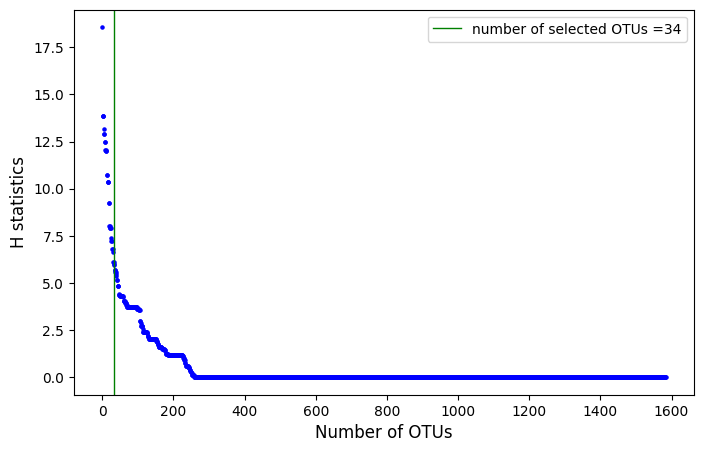

In [15]:
# 2. calculating H score for each OTU
selectedresult=FS.SelectMicro_fun(data,target_variable,p_cutoff = 0.05)

In [16]:
selectedOTU_index= selectedresult['selected_indices']
X_FS = selectedresult['selected_df']

In [22]:
dunn_results, summary = FS.calculate_dunn_tests_pair(
    X_FS,
    target_variable,
    p_threshold=0.05
)

In [23]:
print(summary)

                          Feature  Group1  Group2   P-value EffectDirection
0                 g__Ruminococcus       0       1  0.001582             ↑ 0
1                 g__Ruminococcus       0       2  0.000292             ↑ 0
2                p__Bacteroidetes       0       2  0.000820             ↑ 2
3                  c__Bacteroidia       0       2  0.000820             ↑ 2
4                o__Bacteroidales       0       2  0.000820             ↑ 2
5                   p__Firmicutes       0       2  0.002751             ↑ 0
6                   p__Firmicutes       1       2  0.030003             ↑ 1
7          s__Ruminococcus_bromii       0       1  0.010522               =
8          s__Ruminococcus_bromii       0       2  0.003748               =
9                t__GCF_000209875       0       1  0.010522               =
10               t__GCF_000209875       0       2  0.003748               =
11              p__Actinobacteria       0       2  0.001238               =
12          

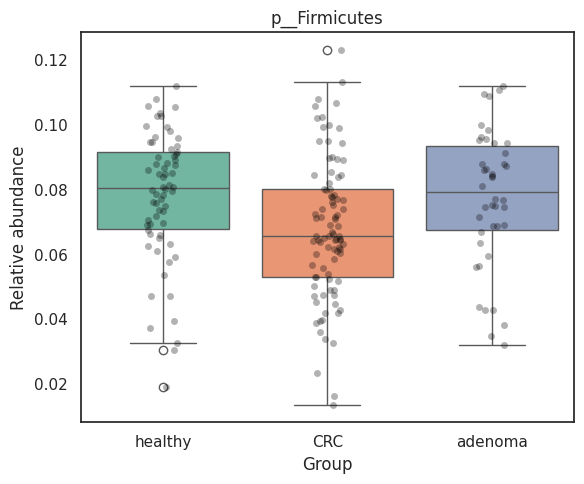

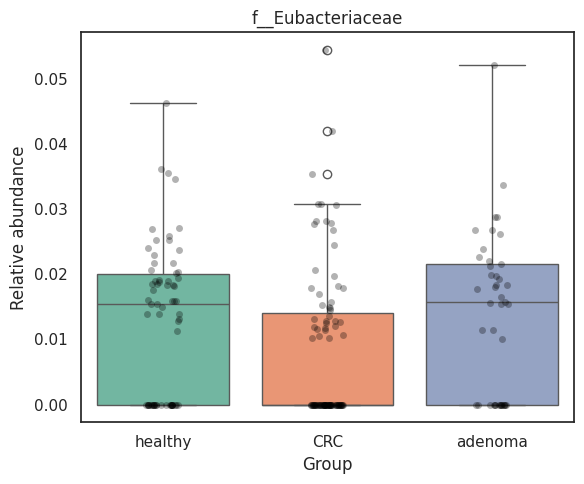

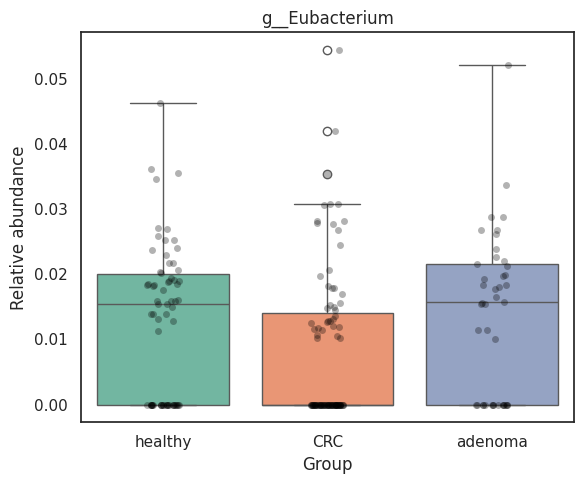

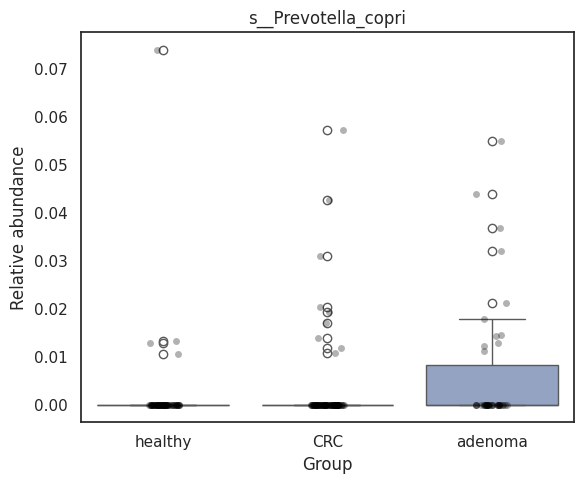

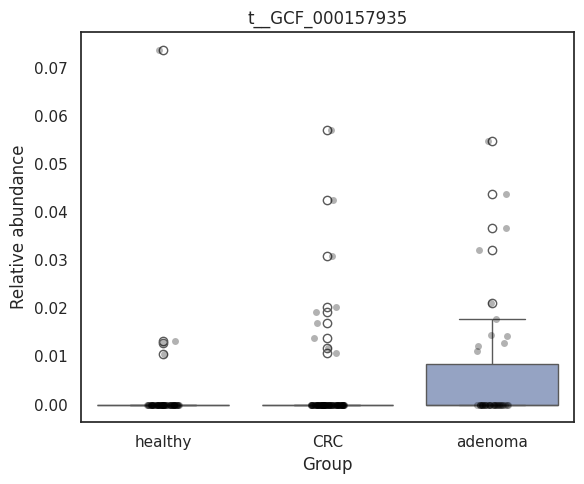

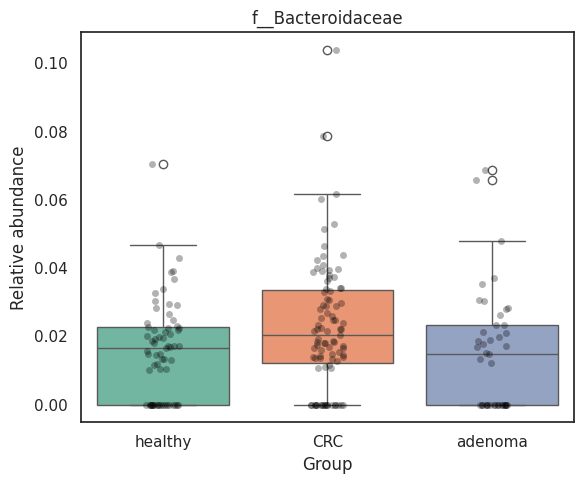

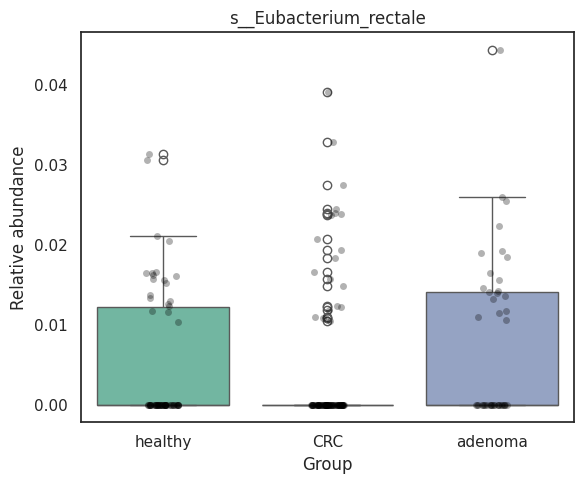

In [58]:
for feature in ['p__Firmicutes','f__Eubacteriaceae','g__Eubacterium','s__Prevotella_copri','t__GCF_000157935','f__Bacteroidaceae','s__Eubacterium_rectale']:
    df_dunntest_x = X_FS[[feature]].copy()
    df_dunntest_x['Group'] = y.values
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df_dunntest_x, x='Group', y=feature, hue='Group', palette='Set2', legend=False)
    sns.stripplot(data=df_dunntest_x, x='Group', y=feature, color='black', alpha=0.3, jitter=True)
    plt.ylabel("Relative abundance")  # Replace with your desired title
    plt.title(f"{feature}")
    plt.tight_layout()
    plt.show()



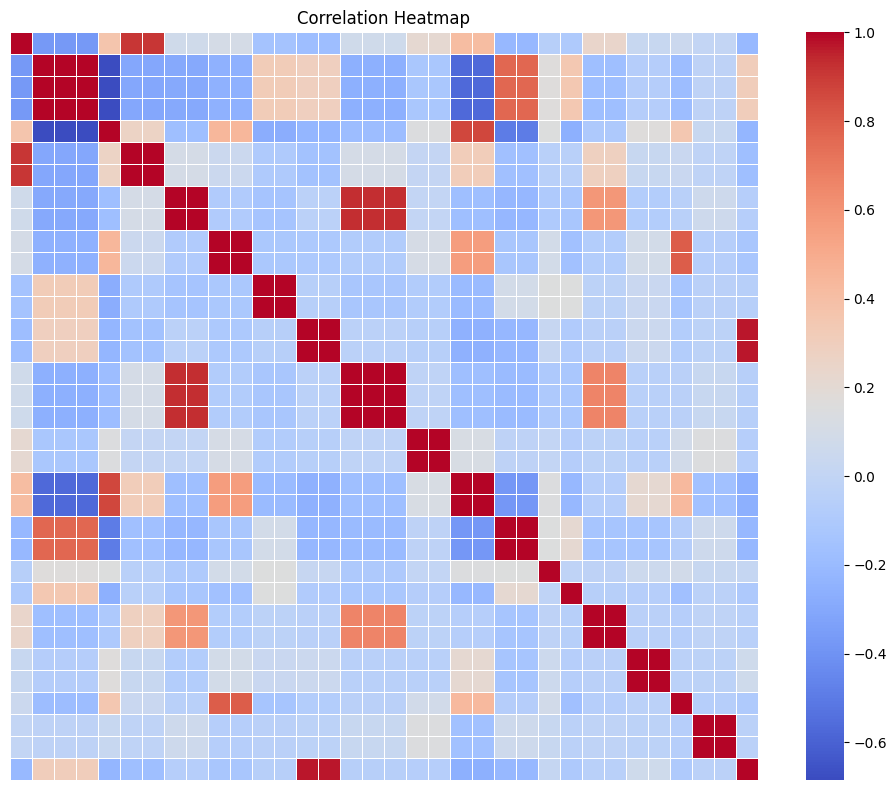

In [24]:
# Compute correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr = X_FS.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5,cbar=True, xticklabels=False, yticklabels=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [79]:
index_FS = np.array(range(34))

subset_index = np.delete(index_FS,[2,3,5,6,8,15,16,17,10,12,14,33,19,21,23,27,29,32])

X_FS_subset = X_FS.iloc[:,subset_index]
X_FS_subset

,g__Ruminococcus,p__Bacteroidetes,p__Firmicutes,p__Actinobacteria,f__Eubacteriaceae,f__Rikenellaceae,s__Prevotella_copri,s__Ruminococcus_sp_5_1_39BFAA,c__Clostridia,f__Bacteroidaceae,k__Bacteria,f__Porphyromonadaceae,s__Bifidobacterium_longum,s__Coprococcus_sp_ART55_1,s__Eubacterium_rectale,s__Streptococcus_thermophilus
CCIS00146684ST-4-0,0.012221,0.024420,0.084757,0.015443,0.015519,0.012527,0.000000,0.0,0.079870,0.000000,0.127978,0.0,0.015101,0.0,0.000000,0.0
CCIS00281083ST-3-0,0.000000,0.093108,0.030740,0.000000,0.000000,0.000000,0.073844,0.0,0.027157,0.013132,0.124929,0.0,0.000000,0.0,0.000000,0.0
CCIS02124300ST-4-0,0.014144,0.014931,0.093310,0.000000,0.020328,0.000000,0.000000,0.0,0.078403,0.000000,0.121153,0.0,0.000000,0.0,0.015188,0.0
CCIS02379307ST-4-0,0.010762,0.066686,0.056785,0.000000,0.012069,0.000000,0.000000,0.0,0.055398,0.051540,0.125834,0.0,0.000000,0.0,0.000000,0.0
CCIS02856720ST-4-0,0.026553,0.028511,0.081342,0.000000,0.019034,0.000000,0.000000,0.0,0.075497,0.018166,0.122910,0.0,0.000000,0.0,0.016519,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMPU29365221ST,0.000000,0.051677,0.053649,0.014530,0.021735,0.000000,0.010606,0.0,0.053022,0.039259,0.125309,0.0,0.000000,0.0,0.000000,0.0
MMPU68403337ST,0.000000,0.029326,0.061104,0.011193,0.000000,0.016250,0.000000,0.0,0.060614,0.000000,0.126765,0.0,0.000000,0.0,0.000000,0.0
MMPU72854103ST,0.000000,0.033049,0.088309,0.000000,0.036221,0.000000,0.000000,0.0,0.079501,0.021891,0.126161,0.0,0.000000,0.0,0.031409,0.0
MMPU84450604ST,0.000000,0.027977,0.067437,0.028628,0.013975,0.000000,0.000000,0.0,0.062786,0.017261,0.126614,0.0,0.000000,0.0,0.000000,0.0


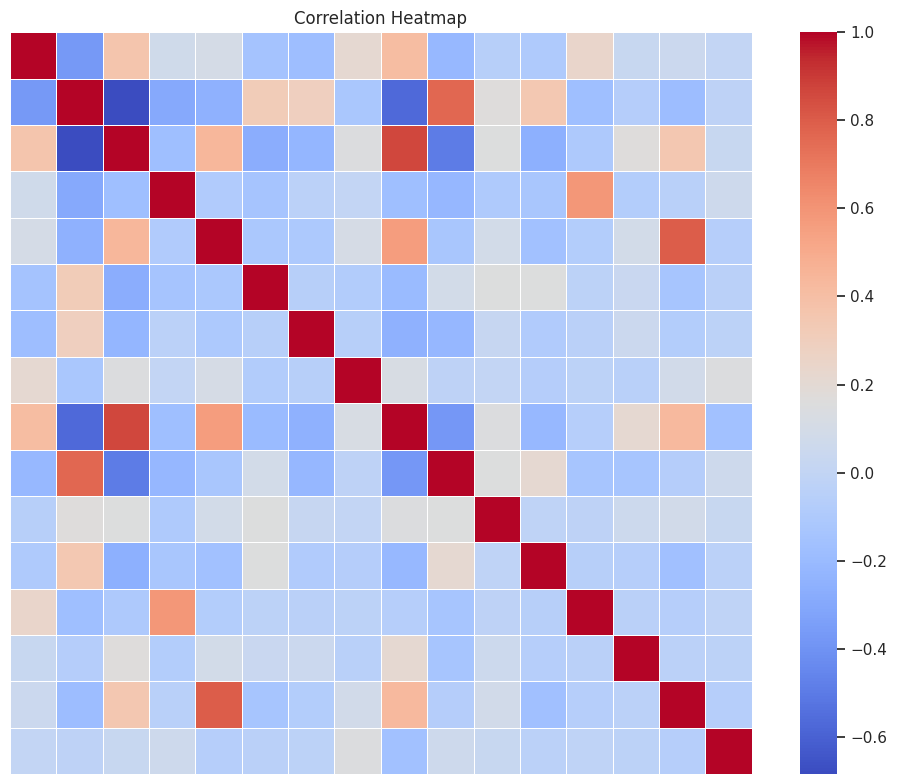

In [78]:
corr = X_FS_subset.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5,cbar=True, xticklabels=False, yticklabels=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [18]:
X_lasso_ft0,selectedOTU_index_Lasso  = RunML.LassoFS_CV(np.array(data),target_variable)
X_lasso_ft = pd.DataFrame(X_lasso_ft0, columns=cols_name[selectedOTU_index_Lasso])

X_FS_lasso_ft0,xlabel_FS_lasso_ft0  = RunML.LassoFS_CV(np.array(X_FS),target_variable)
selectedOTU_index_FS_lasso = selectedOTU_index[xlabel_FS_lasso_ft0]
X_FS_lasso_ft = pd.DataFrame(X_FS_lasso_ft0, columns=cols_name[selectedOTU_index_FS_lasso])

data_subset = {"AllFeatures":data,
               "SelectMicro": X_FS,
               "Lasso_finetune":X_lasso_ft,
               "FS_Lassofinetune":X_FS_lasso_ft
              }

/lustre/isaac24/scratch/mhe8/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.490e-02, tolerance: 1.144e-02
  model = cd_fast.enet_coordinate_descent(


Best alpha: 0.1
Best alpha: 0.01


In [19]:
print(f'The shape of the original dataset is ',np.shape(data))
print(f'The shape of the SelectMicro dataset is ',np.shape(X_FS))
print(f'The shape of the Lasso_finetune selected dataset is ',np.shape(X_lasso_ft))
print(f'The shape of the FS_Lasso_finetune selected dataset is ',np.shape(X_FS_lasso_ft))


The shape of the original dataset is  (199, 1585)
The shape of the SelectMicro dataset is  (199, 34)
The shape of the Lasso_finetune selected dataset is  (199, 19)
The shape of the FS_Lasso_finetune selected dataset is  (199, 20)


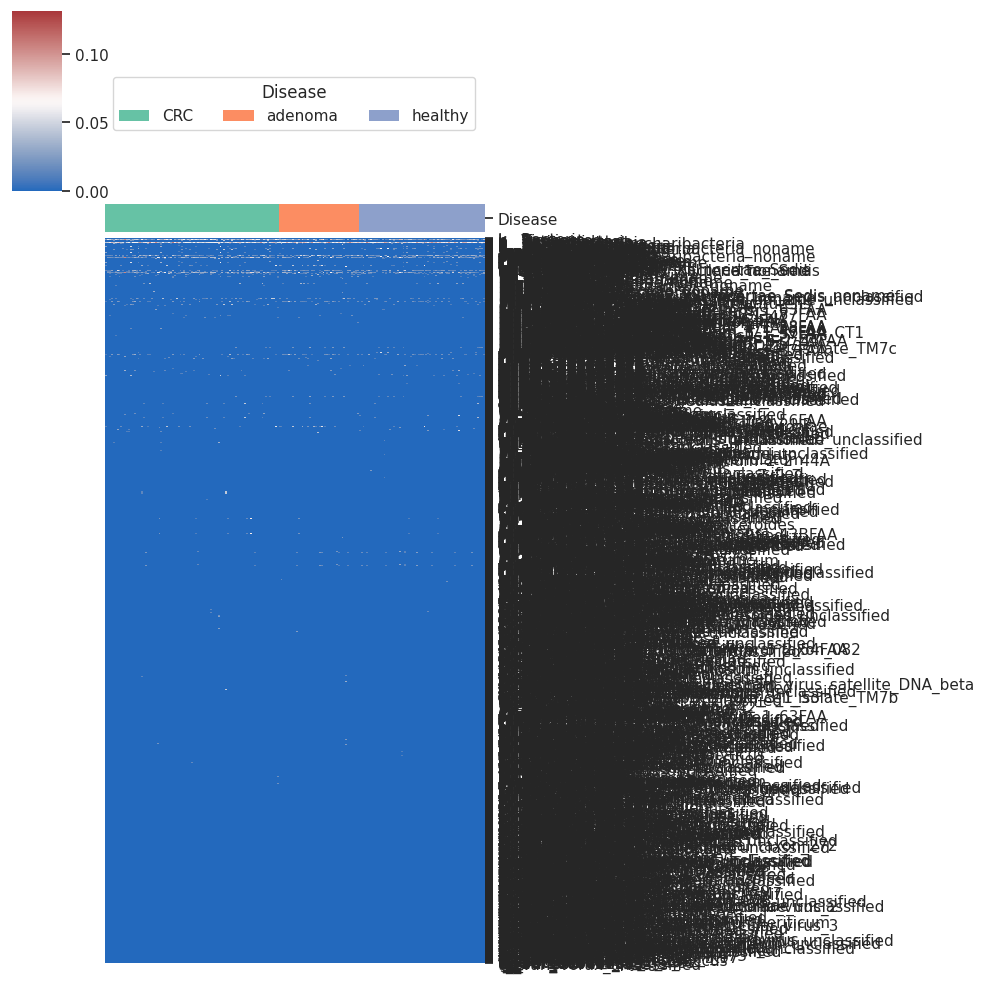

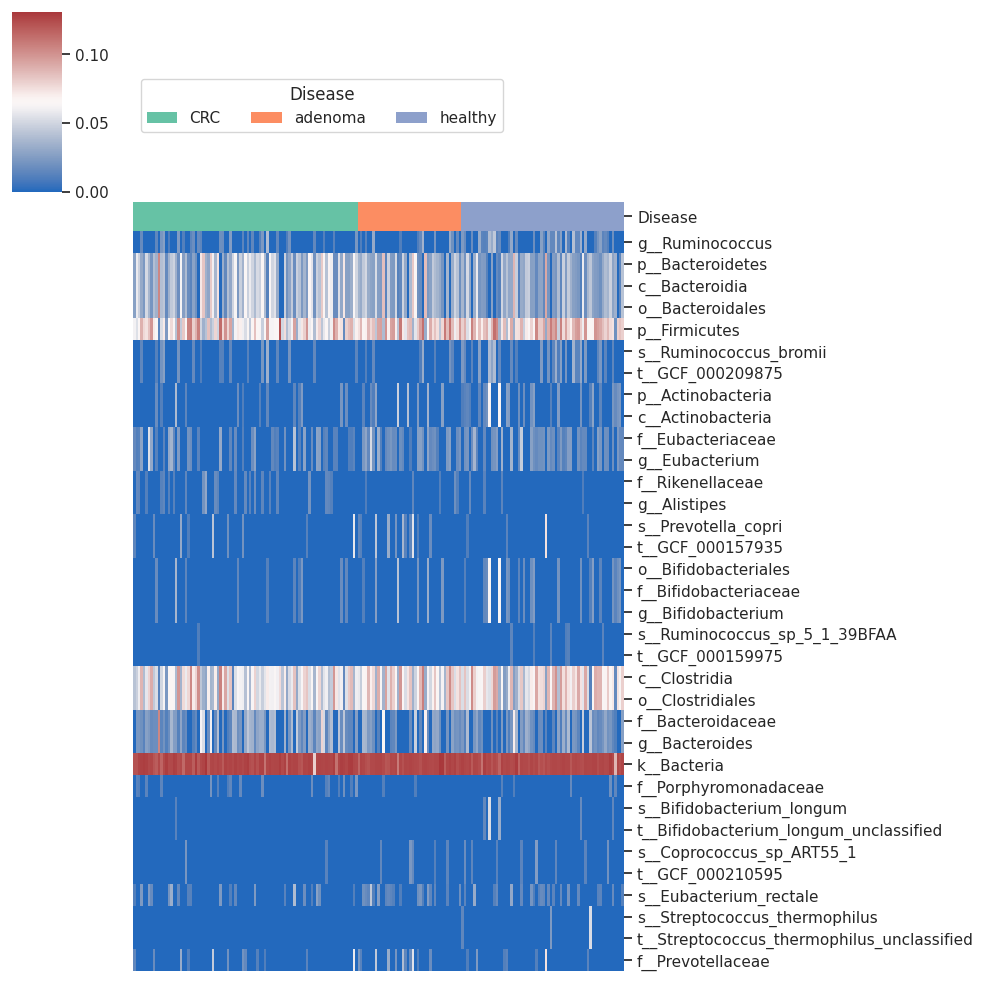

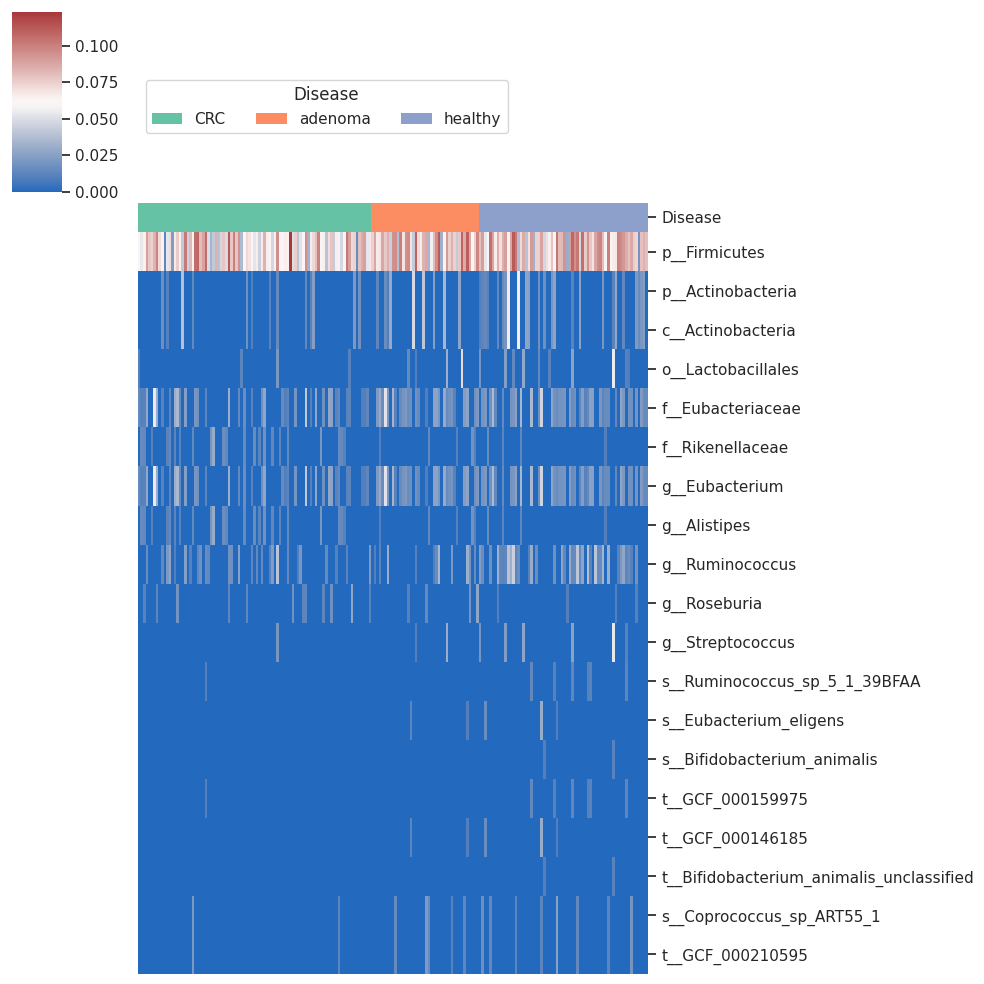

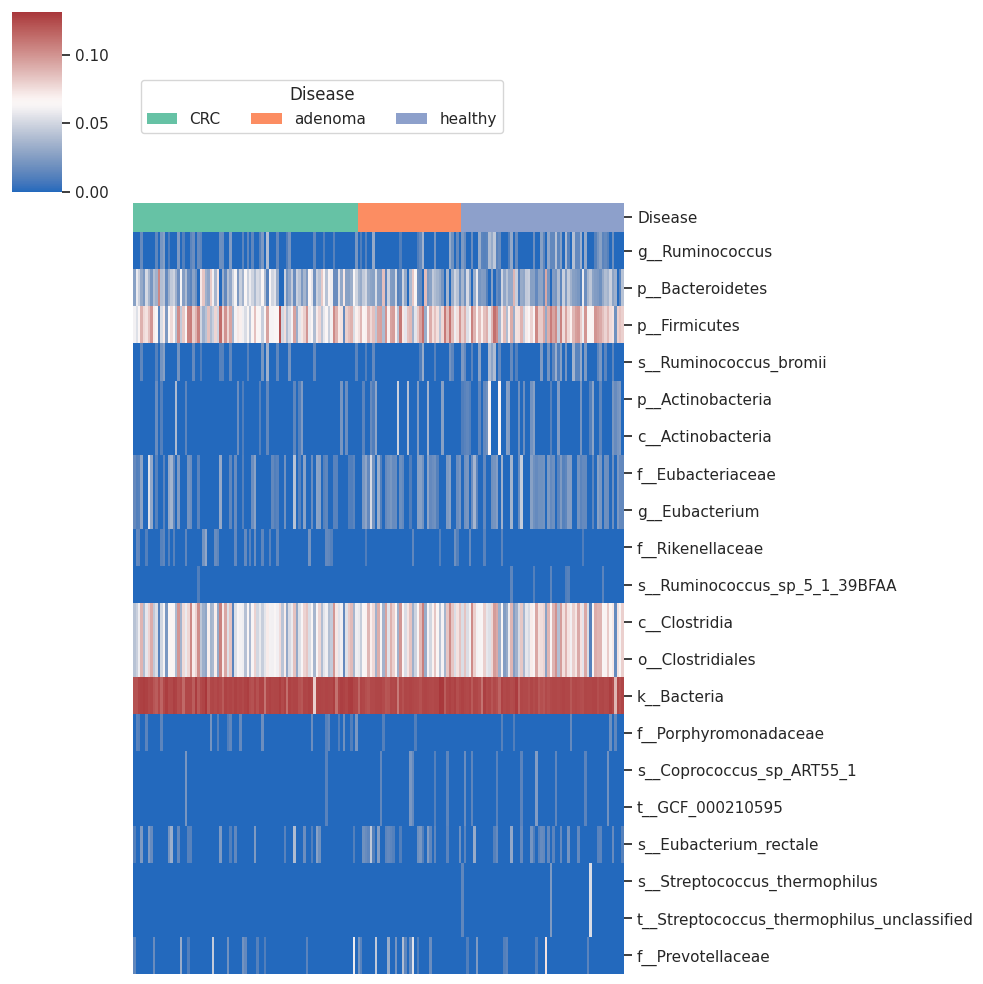

In [49]:
group = pd.DataFrame({'Disease': y})
group.index = meta_2.index
group = group.loc[data0.index]



for datatype, subset in data_subset.items():
    subset.index = data0.index
    plot_heatmap.plot_heatmap(subset,group)
    
    
    

In [59]:
corr

,g__Ruminococcus,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,p__Firmicutes,s__Ruminococcus_bromii,t__GCF_000209875,p__Actinobacteria,c__Actinobacteria,f__Eubacteriaceae,...,k__Bacteria,f__Porphyromonadaceae,s__Bifidobacterium_longum,t__Bifidobacterium_longum_unclassified,s__Coprococcus_sp_ART55_1,t__GCF_000210595,s__Eubacterium_rectale,s__Streptococcus_thermophilus,t__Streptococcus_thermophilus_unclassified,f__Prevotellaceae
g__Ruminococcus,1.000000,-0.374918,-0.374926,-0.374926,0.361781,0.908451,0.908451,0.078278,0.078278,0.099464,...,-0.057287,-0.096153,0.237611,0.237611,0.031756,0.031756,0.050533,0.000389,0.000389,-0.208783
p__Bacteroidetes,-0.374918,1.000000,1.000000,1.000000,-0.684797,-0.307877,-0.307877,-0.293497,-0.293497,-0.252456,...,0.165150,0.345131,-0.175250,-0.175250,-0.066644,-0.066644,-0.189489,-0.023476,-0.023476,0.304690
c__Bacteroidia,-0.374926,1.000000,1.000000,1.000000,-0.684801,-0.307884,-0.307884,-0.293481,-0.293481,-0.252449,...,0.165198,0.345133,-0.175245,-0.175245,-0.066637,-0.066637,-0.189481,-0.023469,-0.023469,0.304670
o__Bacteroidales,-0.374926,1.000000,1.000000,1.000000,-0.684801,-0.307884,-0.307884,-0.293481,-0.293481,-0.252449,...,0.165198,0.345133,-0.175245,-0.175245,-0.066637,-0.066637,-0.189481,-0.023469,-0.023469,0.304670
p__Firmicutes,0.361781,-0.684797,-0.684801,-0.684801,1.000000,0.268385,0.268385,-0.175205,-0.175205,0.445571,...,0.151341,-0.257275,-0.101309,-0.101309,0.168986,0.168986,0.349519,0.030944,0.030944,-0.225226
s__Ruminococcus_bromii,0.908451,-0.307877,-0.307884,-0.307884,0.268385,1.000000,1.000000,0.099890,0.099890,0.051267,...,-0.049650,-0.051290,0.287820,0.287820,0.027592,0.027592,0.035477,-0.013609,-0.013609,-0.176633
t__GCF_000209875,0.908451,-0.307877,-0.307884,-0.307884,0.268385,1.000000,1.000000,0.099890,0.099890,0.051267,...,-0.049650,-0.051290,0.287820,0.287820,0.027592,0.027592,0.035477,-0.013609,-0.013609,-0.176633
p__Actinobacteria,0.078278,-0.293497,-0.293481,-0.293481,-0.175205,0.099890,0.099890,1.000000,1.000000,-0.088254,...,-0.097864,-0.129868,0.591331,0.591331,-0.074900,-0.074900,-0.050885,0.061518,0.061518,-0.059778
c__Actinobacteria,0.078278,-0.293497,-0.293481,-0.293481,-0.175205,0.099890,0.099890,1.000000,1.000000,-0.088254,...,-0.097864,-0.129868,0.591331,0.591331,-0.074900,-0.074900,-0.050885,0.061518,0.061518,-0.059778
f__Eubacteriaceae,0.099464,-0.252456,-0.252449,-0.252449,0.445571,0.051267,0.051267,-0.088254,-0.088254,1.000000,...,0.089521,-0.161539,-0.074592,-0.074592,0.091183,0.091183,0.801529,-0.061694,-0.061694,-0.128534
